In [3]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_dir = "water_data/"
eigenvalue_files = [f for f in os.listdir(data_dir) if "eigenv" in f]
print(len(eigenvalue_files))

5


In [5]:
energy_exact = -75.72977583695142

In [7]:
dfs = []
for evf in eigenvalue_files:
    f = h5py.File(data_dir + evf)
    steps = f["steps"][()]
    f.close()
    df = pd.read_hdf(data_dir + evf, key="eigenvalues")
    df["error"] = abs(df["energy"] - energy_exact)
    df["steps"] = steps
    dfs.append(df)
total_df = pd.concat(dfs)

In [9]:
print(total_df.head())

   d     eps     energy  num_pos     error  steps
i                                                
0  3  0.0001 -76.249842        3  0.520066     25
1  4  0.0001 -75.750416        3  0.020641     25
2  5  0.0001 -77.467244        4  1.737468     25
3  6  0.0001 -75.792791        4  0.063015     25
4  7  0.0001 -75.942124        4  0.212348     25


<Axes: xlabel='steps', ylabel='error'>

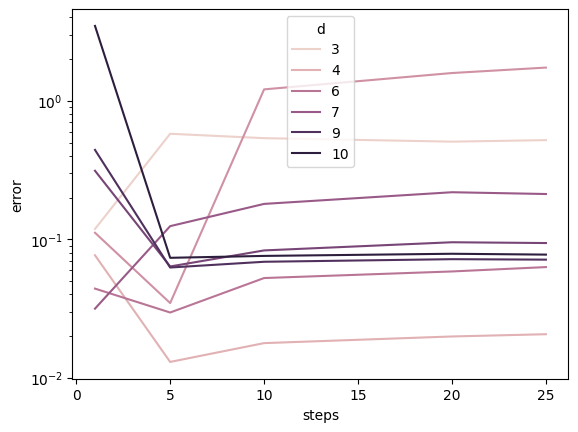

In [12]:
fig, ax = plt.subplots()
ax.set_yscale('log')
sns.lineplot(ax=ax, data=total_df, x="steps", y="error", hue="d")